In [1]:
from acoular import LoudnessStationary, LoudnessTimevariant, TimeSamples, TimeInOut
from mosqito import loudness_zwtv

/Users/sebastianlis/Documents/TU/9. Semester/Python : Akkustik/acoular-1/acoular/h5files.py:5: UserWarning: We detected that Numpy is already loaded and uses OpenBLAS. Because this conflicts with Numba parallel execution, we disable parallel execution for now and processing might be slower. To speed up, either import Numpy after Acoular or set environment variable OPENBLAS_NUM_THREADS=1 before start of the program.
  from .configuration import config


# Example Data

In [2]:
# from os import path

# from acoular import MicGeom, Mixer, PointSource, WNoiseGenerator, WriteH5
# from acoular import __file__ as bpath

# sfreq = 48000
# duration = 1
# nsamples = duration * sfreq
# micgeofile = path.join(path.split(bpath)[0], 'xml', 'array_64.xml')
# h5savefile = 'three_sources_48kHz.h5'

# m = MicGeom(from_file=micgeofile)
# n1 = WNoiseGenerator(sample_freq=sfreq, numsamples=nsamples, seed=1)
# n2 = WNoiseGenerator(sample_freq=sfreq, numsamples=nsamples, seed=2, rms=0.7)
# n3 = WNoiseGenerator(sample_freq=sfreq, numsamples=nsamples, seed=3, rms=0.5)
# p1 = PointSource(signal=n1, mics=m, loc=(-0.1, -0.1, 0.3))
# p2 = PointSource(signal=n2, mics=m, loc=(0.15, 0, 0.3))
# p3 = PointSource(signal=n3, mics=m, loc=(0, 0.1, 0.3))
# p = Mixer(source=p1, sources=[p2, p3])
# wh5 = WriteH5(source=p, name=h5savefile)
# wh5.save()

# Loudness Stationary


In [3]:
ts = TimeSamples(name=r"C:\Users\HP\acoular\examples\example_data.h5")
tio = TimeInOut(source=ts)
# ts.sample_freq
ts.sample_freq

51200.0

In [4]:
ld_st = LoudnessStationary(source=ts)


source changed called
Calculating stationary loudness... depending on the file size, this might take a while
signal resampled to 48 kHz
init called


In [5]:
ld_st.source = tio
ld_st.source = ts

source changed called
Calculating stationary loudness... depending on the file size, this might take a while
source changed called
Calculating stationary loudness... depending on the file size, this might take a while


In [6]:
ld_tv = LoudnessTimevariant(source=tio)

source changed called
Calculating timevariant loudness... depending on the file size, this might take a while
signal resampled to 48 kHz
init called


# Beamforming

In [7]:
import acoular
from os import path

In [15]:
micgeofile = path.join(path.split(acoular.__file__)[0], 'xml', 'array_56.xml')
datafile = r'examples/example_data.h5'
# micgeofile = path.join(path.split(acoular.__file__)[0], 'xml', 'array_64.xml')
# datafile = "three_sources_48kHz.h5"
calibfile = 'example_calib.xml'

In [16]:
mg = acoular.MicGeom(from_file=micgeofile)
ts = acoular.TimeSamples(name=datafile)

rg = acoular.RectGrid(x_min=-0.6, x_max=0.0, y_min=-0.3, y_max=0.3, z=0.68, increment=0.05)
env = acoular.Environment(c=346.04)
st = acoular.SteeringVector(grid=rg, mics=mg, env=env)

In [17]:
bt = acoular.BeamformerTime(source=ts, steer=st)

In [18]:
ld_bt = LoudnessStationary(source=bt)

Exception occurred in traits notification handler for object: <acoular.loudness.LoudnessStationary object at 0x000001B51243B9B0>, trait: source, old value: None, new value: <acoular.tbeamform.BeamformerTime object at 0x000001B5122490D0>
Traceback (most recent call last):
  File "c:\Users\HP\anaconda3\envs\acoular\Lib\site-packages\traits\trait_notifiers.py", line 342, in __call__
    self.handler(*args)
  File "c:\Users\HP\acoular\acoular\loudness.py", line 104, in _source_changed
    for res in self.source.result(self._block_size):
  File "c:\Users\HP\acoular\acoular\tbeamform.py", line 275, in result
    next(fill_buffer_generator)
  File "c:\Users\HP\acoular\acoular\tbeamform.py", line 227, in _fill_buffer
    self.buffer[-ns:, :] = block
    ~~~~~~~~~~~^^^^^^^^^
ValueError: could not broadcast input array from shape (4096,56) into shape (4096,64)


source changed called
init called


In [19]:
oal = ld_bt.overall_loudness
oal = oal.reshape(rg.shape)

AttributeError: 'float' object has no attribute 'reshape'

# Plot

In [ ]:
from pylab import colorbar, figure, imshow, show, subplot, tight_layout, title
import numpy as np

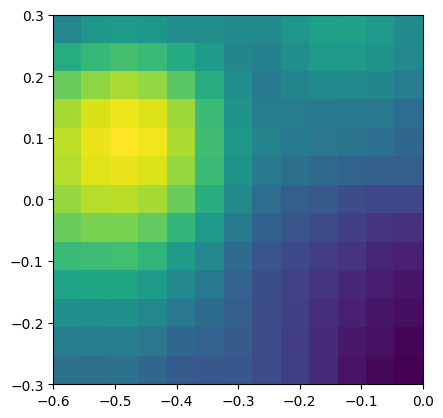

In [ ]:
imshow(oal, vmax=np.max(oal), origin='lower', interpolation='nearest', extent=rg.extend())
show()

In [6]:
ld_tv.show(mg)